# Packages and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
PassengerId     8693 non-null object
HomePlanet      8492 non-null object
CryoSleep       8476 non-null object
Cabin           8494 non-null object
Destination     8511 non-null object
Age             8514 non-null float64
VIP             8490 non-null object
RoomService     8512 non-null float64
FoodCourt       8510 non-null float64
ShoppingMall    8485 non-null float64
Spa             8510 non-null float64
VRDeck          8505 non-null float64
Name            8493 non-null object
Transported     8693 non-null bool
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
train["CryoSleep"].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [5]:
train["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

# Clean the Data

In [6]:
Age_median = train["Age"].median()
train["Age"].fillna(Age_median, inplace = True)
RoomService_median = train["RoomService"].median()
train["RoomService"].fillna(RoomService_median, inplace = True)
FoodCourt_median = train["FoodCourt"].median()
train["FoodCourt"].fillna(FoodCourt_median, inplace = True)
ShoppingMall_median = train["ShoppingMall"].median()
train["ShoppingMall"].fillna(ShoppingMall_median, inplace = True)
Spa_median = train["Spa"].median()
train["Spa"].fillna(Spa_median, inplace = True)
VRDeck_median = train["VRDeck"].median()
train["VRDeck"].fillna(VRDeck_median, inplace = True)
train["CryoSleep"].fillna(False, inplace = True)
train["VIP"].fillna(False, inplace = True)
train.fillna("Unknown", inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
PassengerId     8693 non-null object
HomePlanet      8693 non-null object
CryoSleep       8693 non-null bool
Cabin           8693 non-null object
Destination     8693 non-null object
Age             8693 non-null float64
VIP             8693 non-null bool
RoomService     8693 non-null float64
FoodCourt       8693 non-null float64
ShoppingMall    8693 non-null float64
Spa             8693 non-null float64
VRDeck          8693 non-null float64
Name            8693 non-null object
Transported     8693 non-null bool
dtypes: bool(3), float64(6), object(5)
memory usage: 772.6+ KB


# Feature Engineering

In [7]:
import re
regex1 = '(\D)/\d+/\D'
regex2 = '\D/(\d+)/\D'
regex3 = '\D/\d+/(\D)'
Cabin_Deck = []
Cabin_Num = []
Cabin_Side = []
for i in range(train["Cabin"].shape[0]):
    if train.loc[i,"Cabin"] == "Unknown":
        Cabin_Deck.append("Unknown")    
        Cabin_Num.append(-1)
        Cabin_Side.append("Unknown")
    else:
        Cabin_Deck.append(re.findall(regex1, train.loc[i,"Cabin"])[0])
        Cabin_Num.append(int(re.findall(regex2, train.loc[i,"Cabin"])[0]))
        Cabin_Side.append(re.findall(regex3, train.loc[i,"Cabin"])[0])
train["Cabin_Deck"]= Cabin_Deck
train["Cabin_Num"] = Cabin_Num
train["Cabin_Side"]= Cabin_Side
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_Deck,Cabin_Num,Cabin_Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [8]:
import re
regex4 = '(\d\d\d\d)_\d\d'
regex5 = '\d\d\d\d_(\d\d)'
Group = []
Group_Num = []
for i in range(train["PassengerId"].shape[0]):
    Group.append(int(re.findall(regex4, train.loc[i,"PassengerId"])[0]))
    Group_Num.append(int(re.findall(regex5, train.loc[i,"PassengerId"])[0]))
train["Group"]= Group
train["Group_Num"] = Group_Num
train.drop(["PassengerId", "Name", "Cabin"], axis = 1, inplace = True)
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Num,Cabin_Side,Group,Group_Num
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,1,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,2,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,3,1
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,3,2
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,4,1


In [9]:
train["Cabin_Deck"].value_counts()

F          2794
G          2559
E           876
B           779
C           747
D           478
A           256
Unknown     199
T             5
Name: Cabin_Deck, dtype: int64

In [10]:
train['Cost']=train['RoomService']+train['FoodCourt']+train['ShoppingMall']+train['Spa']+train['VRDeck']

In [11]:
from sklearn.preprocessing import OrdinalEncoder
train["Transported"][train["Transported"]]=1
train["Transported"][train["Transported"]!=1]=0
oe1 = OrdinalEncoder()
train[["HomePlanet","CryoSleep","Destination",
       "VIP","Cabin_Deck","Cabin_Side"]] = oe1.fit_transform(train[["HomePlanet","CryoSleep","Destination",
                                                                    "VIP","Cabin_Deck","Cabin_Side"]])
train = pd.DataFrame(train)
train.head()

D:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Num,Cabin_Side,Group,Group_Num,Cost
0,1.0,0.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,1,1,0.0
1,0.0,0.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,5.0,0,1.0,2,1,736.0
2,1.0,0.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0.0,0,1.0,3,1,10383.0
3,1.0,0.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0.0,0,1.0,3,2,5176.0
4,0.0,0.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,5.0,1,1.0,4,1,1091.0


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
HomePlanet      8693 non-null float64
CryoSleep       8693 non-null float64
Destination     8693 non-null float64
Age             8693 non-null float64
VIP             8693 non-null float64
RoomService     8693 non-null float64
FoodCourt       8693 non-null float64
ShoppingMall    8693 non-null float64
Spa             8693 non-null float64
VRDeck          8693 non-null float64
Transported     8693 non-null float64
Cabin_Deck      8693 non-null float64
Cabin_Num       8693 non-null int64
Cabin_Side      8693 non-null float64
Group           8693 non-null int64
Group_Num       8693 non-null int64
Cost            8693 non-null float64
dtypes: float64(14), int64(3)
memory usage: 1.1 MB


### Visualization

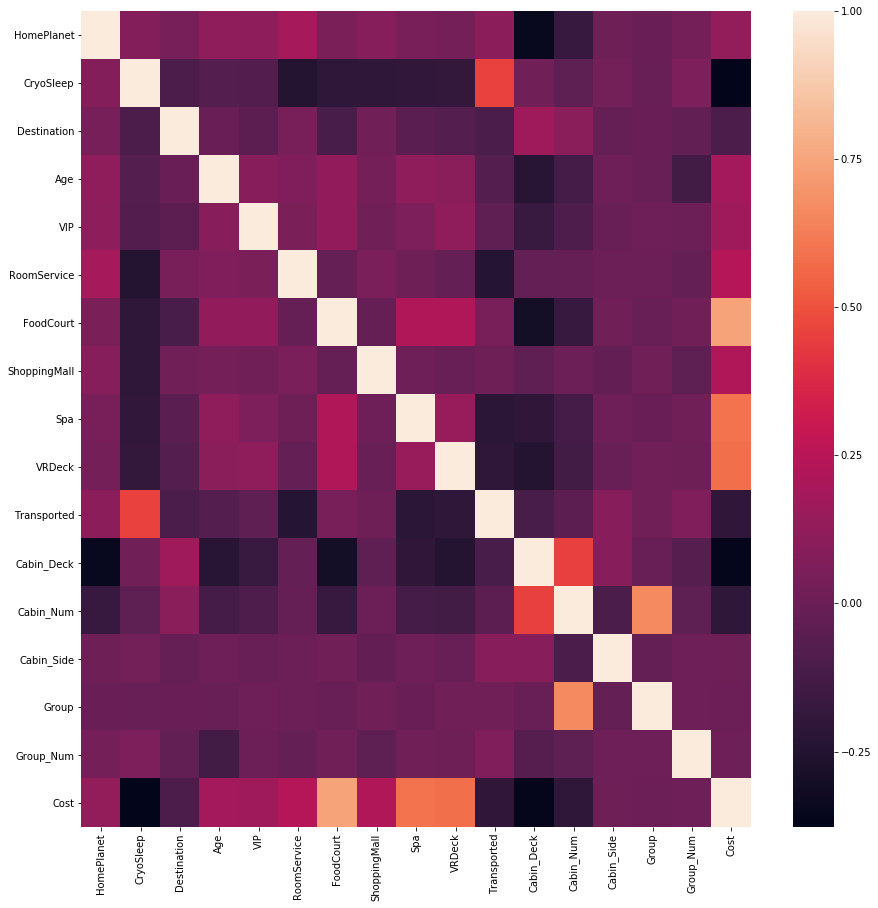

In [13]:
import seaborn as sns

corr = train.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr)

(array([8.297e+03, 2.500e+02, 8.000e+01, 3.400e+01, 1.500e+01, 9.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 3.000e+00]),
 array([    0. ,  2981.3,  5962.6,  8943.9, 11925.2, 14906.5, 17887.8,
        20869.1, 23850.4, 26831.7, 29813. ]),
 <a list of 10 Patch objects>)

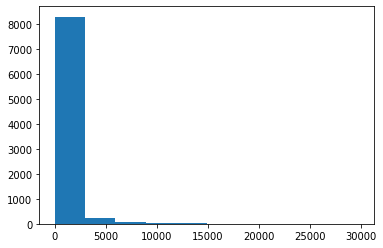

In [14]:
import matplotlib.pyplot as plt
plt.hist(train["FoodCourt"])

(array([8.337e+03, 2.540e+02, 6.500e+01, 1.700e+01, 9.000e+00, 9.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0. ,  1432.7,  2865.4,  4298.1,  5730.8,  7163.5,  8596.2,
        10028.9, 11461.6, 12894.3, 14327. ]),
 <a list of 10 Patch objects>)

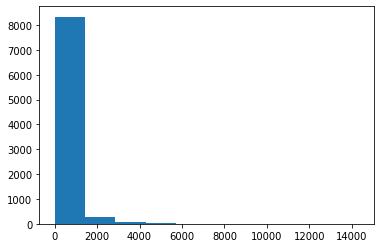

In [15]:
plt.hist(train["RoomService"])

(array([8.609e+03, 6.200e+01, 1.300e+01, 5.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0. ,  2349.2,  4698.4,  7047.6,  9396.8, 11746. , 14095.2,
        16444.4, 18793.6, 21142.8, 23492. ]),
 <a list of 10 Patch objects>)

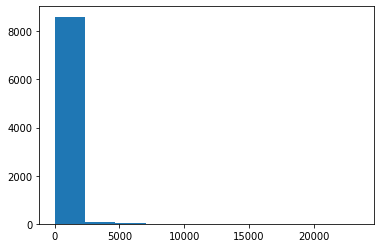

In [16]:
plt.hist(train["ShoppingMall"])

(array([8.44e+03, 1.36e+02, 6.00e+01, 2.60e+01, 1.80e+01, 7.00e+00,
        2.00e+00, 2.00e+00, 1.00e+00, 1.00e+00]),
 array([    0. ,  2413.3,  4826.6,  7239.9,  9653.2, 12066.5, 14479.8,
        16893.1, 19306.4, 21719.7, 24133. ]),
 <a list of 10 Patch objects>)

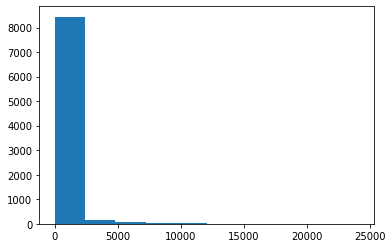

In [17]:
plt.hist(train["VRDeck"])

(array([8.387e+03, 1.800e+02, 7.300e+01, 2.200e+01, 1.500e+01, 6.000e+00,
        6.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([    0. ,  2240.8,  4481.6,  6722.4,  8963.2, 11204. , 13444.8,
        15685.6, 17926.4, 20167.2, 22408. ]),
 <a list of 10 Patch objects>)

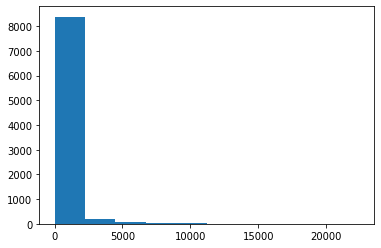

In [18]:
plt.hist(train["Spa"])

In [19]:
train["FoodCourt_Bool"] = train["FoodCourt"]!=0
train["RoomService_Bool"] = train["RoomService"]!=0
train["ShoppingMall_Bool"] = train["ShoppingMall"]!=0
train["Spa_Bool"] = train["Spa"]!=0
train["VRDeck_Bool"] = train["VRDeck"]!=0

In [20]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin_Num,Cabin_Side,Group,Group_Num,Cost,FoodCourt_Bool,RoomService_Bool,ShoppingMall_Bool,Spa_Bool,VRDeck_Bool
0,1.0,0.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,1,1,0.0,False,False,False,False,False
1,0.0,0.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,...,0,1.0,2,1,736.0,True,True,True,True,True
2,1.0,0.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,...,0,1.0,3,1,10383.0,True,True,False,True,True
3,1.0,0.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,...,0,1.0,3,2,5176.0,True,False,True,True,True
4,0.0,0.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,...,1,1.0,4,1,1091.0,True,True,True,True,True


In [21]:
oe2 = OrdinalEncoder()
train[["FoodCourt_Bool","RoomService_Bool","ShoppingMall_Bool",
       "Spa_Bool","VRDeck_Bool"]] = oe2.fit_transform(train[["FoodCourt_Bool","RoomService_Bool",
                                                            "ShoppingMall_Bool","Spa_Bool","VRDeck_Bool"]])
train = pd.DataFrame(train)
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin_Num,Cabin_Side,Group,Group_Num,Cost,FoodCourt_Bool,RoomService_Bool,ShoppingMall_Bool,Spa_Bool,VRDeck_Bool
0,1.0,0.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,...,0,1.0,2,1,736.0,1.0,1.0,1.0,1.0,1.0
2,1.0,0.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,...,0,1.0,3,1,10383.0,1.0,1.0,0.0,1.0,1.0
3,1.0,0.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,...,0,1.0,3,2,5176.0,1.0,0.0,1.0,1.0,1.0
4,0.0,0.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,...,1,1.0,4,1,1091.0,1.0,1.0,1.0,1.0,1.0


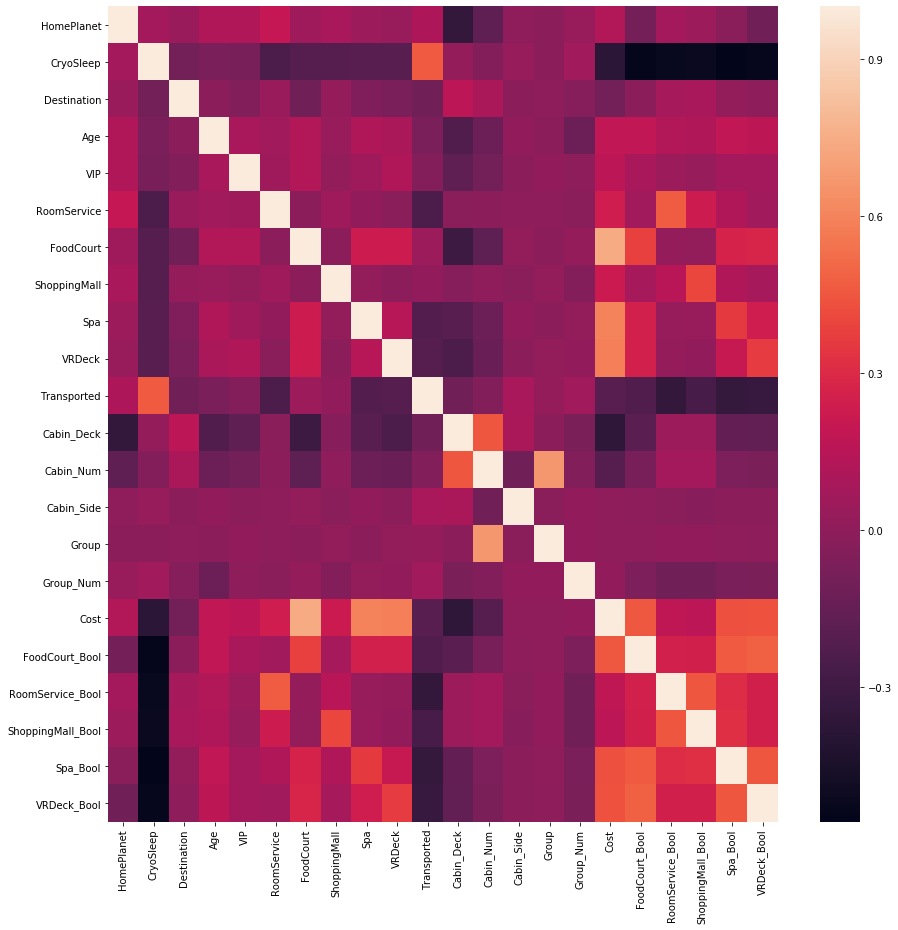

In [22]:
corr = train.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr)

In [23]:
X = train.drop(["Transported"], axis = 1)
y = train["Transported"]

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X)
X = pd.DataFrame(ss.transform(X), columns = X.columns)
X.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin_Num,Cabin_Side,Group,Group_Num,Cost,FoodCourt_Bool,RoomService_Bool,ShoppingMall_Bool,Spa_Bool,VRDeck_Bool
0,0.325245,-0.73277,0.577024,0.711945,-0.153063,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,...,-1.141521,-0.993729,-1.734409,-0.491161,-0.514066,-0.735925,-0.713951,-0.707168,-0.760616,-0.72777
1,-0.833031,-0.73277,0.577024,-0.334037,-0.153063,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,...,-1.141521,0.849738,-1.734034,-0.491161,-0.251479,1.358834,1.400657,1.414092,1.314724,1.37406
2,0.325245,-0.73277,0.577024,2.036857,6.533255,-0.268001,1.959998,-0.283579,5.695623,-0.219796,...,-1.141521,0.849738,-1.733660,-0.491161,3.190333,1.358834,1.400657,-0.707168,1.314724,1.37406
3,0.325245,-0.73277,0.577024,0.293552,-0.153063,-0.333105,0.523010,0.336851,2.687176,-0.092818,...,-1.141521,0.849738,-1.733660,0.457443,1.332604,1.358834,-0.713951,1.414092,1.314724,1.37406
4,-0.833031,-0.73277,0.577024,-0.891895,-0.153063,0.125652,-0.237159,-0.031059,0.231374,-0.261240,...,-1.139575,0.849738,-1.733286,-0.491161,-0.124824,1.358834,1.400657,1.414092,1.314724,1.37406


In [25]:
y.value_counts()

1.0    4378
0.0    4315
Name: Transported, dtype: int64

# Training

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

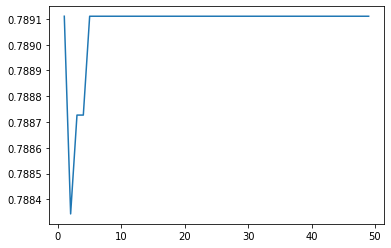

In [27]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
result = []
for i in range(1,50):
    log_reg = LogisticRegression(random_state = 0,C = i/5)
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    result.append(accuracy_score(y_test, y_pred))
plt.plot([i for i in range(1,50)],result)
plt.show()

In [28]:
log_reg = LogisticRegression(C=4.5)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

acc = accuracy_score(y_test, y_pred)
fl = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("LogisticRegression: ",acc,fl,prec,recall)

LogisticRegression:  0.7891104294478528 0.7911921032649963 0.7628111273792094 0.8217665615141956


In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 0,n_estimators = 200)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

acc = accuracy_score(y_test, y_pred)
fl = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("RandomForestClassifier with n_estimators 200:",acc,fl,prec,recall)

RandomForestClassifier with n_estimators 200: 0.7944785276073619 0.7856 0.797077922077922 0.7744479495268138


result = []
for i in range(10,301,10):
    rfc = RandomForestClassifier(random_state = 0,n_estimators = i)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    result.append(accuracy_score(y_test, y_pred))
plt.plot([i for i in range(10,301,10)],result)
plt.show()

In [30]:
from sklearn.svm import SVC
svc_lin = SVC(random_state = 0,kernel = 'linear', C = 4)
svc_lin.fit(X_train, y_train)
y_pred = svc_lin.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("SVC(linear):",acc,fl,prec,recall)

SVC(linear): 0.7914110429447853 0.7856 0.7535014005602241 0.8485804416403786


result = []
for i in range(1,40):
    svc_lin = SVC(random_state = 0,kernel = 'linear',C = i/5)
    svc_lin.fit(X_train, y_train)
    y_pred = svc_lin.predict(X_test)
    result.append(accuracy_score(y_test, y_pred))
plt.plot([i for i in range(1,40)],result)
plt.show()

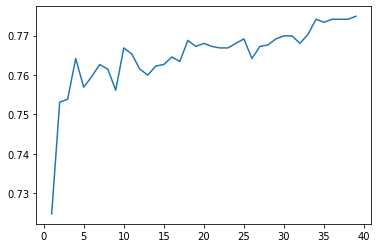

In [31]:
from sklearn.neighbors import KNeighborsClassifier
result = []
for i in range(1,40):
    knc =  KNeighborsClassifier(n_neighbors = i)
    knc.fit(X_train, y_train)
    y_pred = knc.predict(X_test)
    result.append(accuracy_score(y_test, y_pred))
plt.plot([i for i in range(1,40)],result)
plt.show()

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=14)
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("KNC:",acc,fl,prec,recall)

KNC: 0.776457055214724 0.7856 0.8110808356039964 0.7042586750788643


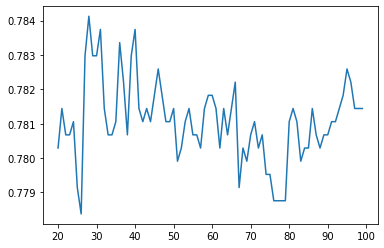

In [33]:
from sklearn.ensemble import AdaBoostClassifier
result = []
for i in range(20,100):
    abc =  AdaBoostClassifier(n_estimators = i)
    abc.fit(X_train, y_train)
    y_pred = abc.predict(X_test)
    result.append(accuracy_score(y_test, y_pred))
plt.plot([i for i in range(20,100)],result)
plt.show()

In [32]:
from sklearn.ensemble import AdaBoostClassifier
abc =  AdaBoostClassifier(n_estimators = 85)
abc.fit(X_train, y_train)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("AdaBoostClassifier:",acc,fl,prec,recall)

AdaBoostClassifier: 0.776457055214724 0.7856 0.8110808356039964 0.7042586750788643


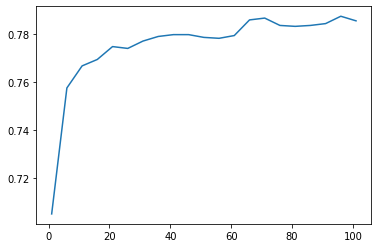

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
result = []
for i in range(1,102,5):
    etc = ExtraTreesClassifier(random_state=0,n_estimators=i)
    etc.fit(X_train, y_train)
    y_pred = etc.predict(X_test)
    result.append(accuracy_score(y_test, y_pred))
plt.plot([i for i in range(1,102,5)],result)
plt.show()

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(X_train, y_train)
acc = accuracy_score(y_test, y_pred)
y_pred = etc.predict(X_test)

prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("ExtraTrees:",acc,fl,prec,recall)

ExtraTrees: 0.776457055214724 0.7856 0.8031825795644891 0.7563091482649842


In [34]:
estimators = [
  ('rfc', RandomForestClassifier(n_estimators=200)),
  ('log_reg', LogisticRegression(C = 4.5)),
    ('svc_lin', SVC(kernel = 'linear',C = 4)),
    ('knc', KNeighborsClassifier(n_neighbors=14)),
    ('abc', AdaBoostClassifier(n_estimators = 85)),
    ('etc', ExtraTreesClassifier(n_estimators=100))]

In [35]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),cv = 3)
clf.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

acc = accuracy_score(y_test, y_pred)
fl = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Model Stacking:",acc,fl,prec,recall)

Model Stacking: 0.7944785276073619 0.7856 0.797077922077922 0.7744479495268138


In [36]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_test, y_pred, cv=5, scoring="accuracy")

array([0.90804598, 0.90613027, 0.91762452, 0.93474088, 0.87523992])

# Testing

In [37]:
test = pd.read_csv("test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
PassengerId     4277 non-null object
HomePlanet      4190 non-null object
CryoSleep       4184 non-null object
Cabin           4177 non-null object
Destination     4185 non-null object
Age             4186 non-null float64
VIP             4184 non-null object
RoomService     4195 non-null float64
FoodCourt       4171 non-null float64
ShoppingMall    4179 non-null float64
Spa             4176 non-null float64
VRDeck          4197 non-null float64
Name            4183 non-null object
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


D:\Users\Administrator\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Users\Administrator\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3.964e+03, 1.160e+02, 4.900e+01, 2.200e+01, 1.200e+01, 0.000e+00,
        4.000e+00, 0.000e+00, 2.000e+00, 2.000e+00]),
 array([    0. ,  2527.3,  5054.6,  7581.9, 10109.2, 12636.5, 15163.8,
        17691.1, 20218.4, 22745.7, 25273. ]),
 <a list of 10 Patch objects>)

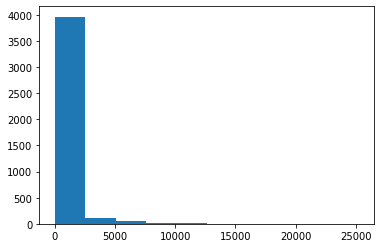

In [38]:
plt.hist(test["FoodCourt"])

In [39]:
Age_median = test["Age"].median()
test["Age"].fillna(Age_median, inplace = True)
RoomService_median = test["RoomService"].median()
test["RoomService"].fillna(RoomService_median, inplace = True)
FoodCourt_median = test["FoodCourt"].median()
test["FoodCourt"].fillna(FoodCourt_median, inplace = True)
ShoppingMall_median = test["ShoppingMall"].median()
test["ShoppingMall"].fillna(ShoppingMall_median, inplace = True)
Spa_median = test["Spa"].median()
test["Spa"].fillna(Spa_median, inplace = True)
VRDeck_median = test["VRDeck"].median()
test["VRDeck"].fillna(VRDeck_median, inplace = True)
test["CryoSleep"].fillna(False, inplace = True)
test["VIP"].fillna(False, inplace = True)
test.fillna("Unknown", inplace = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
PassengerId     4277 non-null object
HomePlanet      4277 non-null object
CryoSleep       4277 non-null bool
Cabin           4277 non-null object
Destination     4277 non-null object
Age             4277 non-null float64
VIP             4277 non-null bool
RoomService     4277 non-null float64
FoodCourt       4277 non-null float64
ShoppingMall    4277 non-null float64
Spa             4277 non-null float64
VRDeck          4277 non-null float64
Name            4277 non-null object
dtypes: bool(2), float64(6), object(5)
memory usage: 376.0+ KB


In [40]:
import re
regex1 = '(\D)/\d+/\D'
regex2 = '\D/(\d+)/\D'
regex3 = '\D/\d+/(\D)'
Cabin_Deck = []
Cabin_Num = []
Cabin_Side = []
for i in range(test["Cabin"].shape[0]):
    if test.loc[i,"Cabin"] == "Unknown":
        Cabin_Deck.append("Unknown")    
        Cabin_Num.append(-1)
        Cabin_Side.append("Unknown")
    else:
        Cabin_Deck.append(re.findall(regex1, test.loc[i,"Cabin"])[0])
        Cabin_Num.append(int(re.findall(regex2, test.loc[i,"Cabin"])[0]))
        Cabin_Side.append(re.findall(regex3, test.loc[i,"Cabin"])[0])
test["Cabin_Deck"]= Cabin_Deck
test["Cabin_Num"] = Cabin_Num
test["Cabin_Side"]= Cabin_Side
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_Deck,Cabin_Num,Cabin_Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S


In [41]:
import re
regex4 = '(\d\d\d\d)_\d\d'
regex5 = '\d\d\d\d_(\d\d)'
Group = []
Group_Num = []
for i in range(test["PassengerId"].shape[0]):
    Group.append(int(re.findall(regex4, test.loc[i,"PassengerId"])[0]))
    Group_Num.append(int(re.findall(regex5, test.loc[i,"PassengerId"])[0]))
test["Group"]= Group
test["Group_Num"] = Group_Num
test.drop(["PassengerId", "Name", "Cabin"], axis = 1, inplace = True)
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Deck,Cabin_Num,Cabin_Side,Group,Group_Num
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S,13,1
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S,18,1
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S,19,1
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S,21,1
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S,23,1


In [42]:
test["Group_Num"].value_counts()

1    3063
2     723
3     269
4     107
5      56
6      33
7      20
8       6
Name: Group_Num, dtype: int64

In [43]:
test['Cost']=test['RoomService']+test['FoodCourt']+test['ShoppingMall']+test['Spa']+test['VRDeck']

In [44]:
test[["HomePlanet","CryoSleep","Destination","VIP",
      "Cabin_Deck","Cabin_Side"]] = oe1.transform(test[["HomePlanet","CryoSleep","Destination","VIP",
                                                                     "Cabin_Deck","Cabin_Side"]])
test = pd.DataFrame(test)
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Deck,Cabin_Num,Cabin_Side,Group,Group_Num,Cost
0,0.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3,1.0,13,1,0.0
1,0.0,0.0,2.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,5.0,4,1.0,18,1,2832.0
2,1.0,1.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,1.0,19,1,0.0
3,1.0,0.0,2.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,2.0,1,1.0,21,1,7418.0
4,0.0,0.0,2.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,5.0,5,1.0,23,1,645.0


In [45]:
test["FoodCourt_Bool"] = test["FoodCourt"]!=0
test["RoomService_Bool"] = test["RoomService"]!=0
test["ShoppingMall_Bool"] = test["ShoppingMall"]!=0
test["Spa_Bool"] = test["Spa"]!=0
test["VRDeck_Bool"] = test["VRDeck"]!=0

In [46]:
test[["FoodCourt_Bool","RoomService_Bool","ShoppingMall_Bool",
       "Spa_Bool","VRDeck_Bool"]] = oe2.transform(test[["FoodCourt_Bool","RoomService_Bool",
                                                            "ShoppingMall_Bool","Spa_Bool","VRDeck_Bool"]])
test = pd.DataFrame(test)
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin_Num,Cabin_Side,Group,Group_Num,Cost,FoodCourt_Bool,RoomService_Bool,ShoppingMall_Bool,Spa_Bool,VRDeck_Bool
0,0.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1.0,13,1,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,...,4,1.0,18,1,2832.0,1.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1.0,19,1,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,2.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,...,1,1.0,21,1,7418.0,1.0,0.0,0.0,1.0,1.0
4,0.0,0.0,2.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,...,5,1.0,23,1,645.0,0.0,1.0,1.0,0.0,0.0


In [47]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(test)
test = pd.DataFrame(ss.transform(test), columns = test.columns)
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin_Num,Cabin_Side,Group,Group_Num,Cost,FoodCourt_Bool,RoomService_Bool,ShoppingMall_Bool,Spa_Bool,VRDeck_Bool
0,-0.838947,1.330443,0.558831,-0.114147,-0.132689,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,...,-1.146422,0.853405,-1.703425,-0.489847,-0.503425,-0.727795,-0.723290,-0.710582,-0.759648,-0.712445
1,-0.838947,-0.751630,0.558831,-0.684313,-0.132689,-0.357339,-0.277879,-0.312173,2.287504,-0.246712,...,-1.144488,0.853405,-1.701584,-0.489847,0.502231,1.374014,-0.723290,-0.710582,1.316399,-0.712445
2,0.313696,1.330443,-1.857871,0.170937,-0.132689,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,...,-1.152223,0.853405,-1.701215,-0.489847,-0.503425,-0.727795,-0.723290,-0.710582,-0.759648,-0.712445
3,0.313696,-0.751630,0.558831,0.669832,-0.132689,-0.357339,4.121518,-0.312173,-0.104002,0.226648,...,-1.150289,0.853405,-1.700479,-0.489847,2.130740,1.374014,-0.723290,-0.710582,1.316399,1.403616
4,-0.838947,-0.751630,0.558831,-0.613042,-0.132689,-0.340723,-0.283840,0.832122,-0.267841,-0.246712,...,-1.142555,0.853405,-1.699743,-0.489847,-0.274383,-0.727795,1.382572,1.407298,-0.759648,-0.712445


(array([4.07e+03, 1.16e+02, 4.90e+01, 2.20e+01, 1.20e+01, 0.00e+00,
        4.00e+00, 0.00e+00, 2.00e+00, 2.00e+00]),
 array([-0.28383979,  1.38989163,  3.06362306,  4.73735448,  6.4110859 ,
         8.08481732,  9.75854874, 11.43228016, 13.10601158, 14.779743  ,
        16.45347443]),
 <a list of 10 Patch objects>)

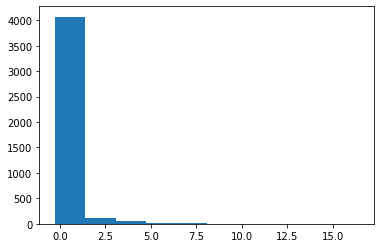

In [48]:
plt.hist(test["FoodCourt"])

In [49]:
test_pred = clf.predict(test)
test_pred = test_pred == 1

In [50]:
test_pred

array([ True, False,  True, ...,  True,  True,  True])

In [51]:
result = pd.read_csv("test.csv")[["PassengerId"]]
result["Transported"] = test_pred

In [52]:
result.head(), result.shape

(  PassengerId  Transported
 0     0013_01         True
 1     0018_01        False
 2     0019_01         True
 3     0021_01         True
 4     0023_01         True, (4277, 2))

In [53]:
result.to_csv('submission.csv',index = False)